## IA : Mini-projet
- Aubert Nicolas,
- ISC3il-b

# Exercice 1 - Classification de texte

## Data loading

Soit les commentaires sur les films stockés dans le répertoire data. Chaque commentaire est mis sur un fichier (lire un exemple). Le sous-répertoire pos contient les fichiers des commentaires positifs et le neg contient les commentaires négatifs. Le but de cet exercice est d’implémenter un classificateur positif/négatif des commentaires en texte.

In [7]:
# Charger les fichiers depuis le répertoire data en utilisant la méthode load_files() du package sklearn.datasets.
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

# Charger les données (./exo1/data')
data = load_files("./exo1/data/")

print(data.target_names)

# Diviser les données en train et test avec une répartition de 70-30%.
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

# Load les données de test (./exo1/data/test.csv')
data_test = load_files("./exo1/data/")

['neg', 'pos']


## Classificateur Naïf

In [8]:
# Implémenter le classificateur Naïf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Créer un pipeline avec CountVectorizer et MultinomialNB
text_clf = Pipeline([('vect', CountVectorizer()),
                        ('clf', MultinomialNB())])

# Entraîner le modèle
text_clf.fit(X_train, y_train)

# Prédire les données de test
predicted = text_clf.predict(X_test)

# Afficher le taux de précision
from sklearn import metrics
 
print(metrics.classification_report(y_test, predicted, target_names=data.target_names))

              precision    recall  f1-score   support

         neg       0.93      0.86      0.89       303
         pos       0.87      0.93      0.90       297

    accuracy                           0.89       600
   macro avg       0.90      0.89      0.89       600
weighted avg       0.90      0.89      0.89       600



## Classificateur Bayes

In [9]:
# Implémenter le classificateur Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline

# Créer un pipeline avec CountVectorizer et BernoulliNB
text_clf = Pipeline([('vect', CountVectorizer()),
                        ('clf', BernoulliNB())])

# Entraîner le modèle
text_clf.fit(X_train, y_train)

# Prédire les données de test
predicted = text_clf.predict(X_test)

# Afficher le taux de précision
from sklearn import metrics

print(metrics.classification_report(y_test, predicted, target_names=data.target_names))

              precision    recall  f1-score   support

         neg       0.92      0.85      0.88       303
         pos       0.86      0.93      0.89       297

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



## Réseau neuronal

In [10]:
# Importer Keras et créer un réseau
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np

# Afficher le type de données
print(type(X_train))

# Utiliser un vecteur pour transformer les données
vectorizer = CountVectorizer()

# Fit le vecteur sur les données d'entraînement
vectorizer.fit(X_train)

# Transformer les données
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

input_dim = X_train.shape[1]  # Nombre de features

# Créer un réseau de neurones avec 3 couches
model = Sequential()

# Ajouter une couche d'entrée avec 100 neurones
model.add(Dense(100, input_dim=input_dim, activation='relu'))

# Ajouter une couche cachée avec 50 neurones
# model.add(Dense(50, activation='sigmoid'))

# Ajouter une couche de sortie avec 1 neurone
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# entrainer le model (exemple de paramètres)
history = model.fit(X_train, y_train, epochs=100, verbose=False, validation_data=(X_test, y_test), batch_size=10)

<class 'list'>
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1281500   
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,281,601
Trainable params: 1,281,601
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000


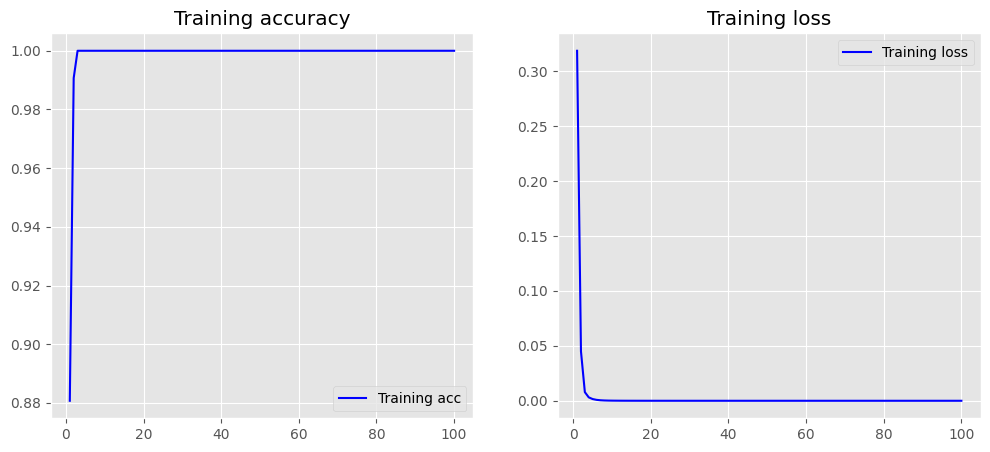

In [11]:
# évaluer le modèle
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

# afficher l’accuracy
print("Training Accuracy: {:.4f}".format(accuracy))

# plotter le loss et l’accuracy du history
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.title('Training accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.title('Training loss')
    plt.legend()
    
plot_history(history)

# Exercice 2 - Classification de mobiles
Le but de ce classificateur est de prédire les classes de prix (price_range) (0, 1, 2, 3) des téléphones portables à partir de leurs caractéristiques techniques (puissance de la batterie, couleurs, mémoire, etc.).

## Data loading

In [12]:

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("./exo2/data/train.csv")

print(df.head(10))

# 2. Enlever depuis les données de train les lignes où la colonne px_height est nulle.
df = df[df['px_height'].notnull()]

# 3. Diviser les données en train et test.
X_train, X_test, y_train, y_test = train_test_split(df.drop('price_range', axis=1), df['price_range'], test_size=0.3, random_state=0)

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   
6           1821     0          1.7         0   4       1          10    0.8   
7           1954     0          0.5         1   0       0          24    0.8   
8           1445     1          0.5         0   0       0          53    0.7   
9            509     1          0.6         1   2       1           9    0.1   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20  

In [13]:
# Implémenter un pipeline SVM avec un scaler de votre choix.
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

# Entraîner le modèle
pipe.fit(X_train, y_train)

# Prédire les données de test
predicted = pipe.predict(X_test)

# Afficher le taux de précision
print(accuracy_score(y_test, predicted))

# Afficher le rapport d’évaluation après l’évaluation des données de test.
print(classification_report(y_test, predicted))

0.8866666666666667
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       151
           1       0.82      0.85      0.83       135
           2       0.83      0.85      0.84       151
           3       0.97      0.89      0.93       163

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



In [14]:
# Implémenter un arbre de décision
from sklearn.tree import DecisionTreeClassifier

# Créer un pipeline avec StandardScaler et DecisionTreeClassifier
pipe = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())])

# Entraîner le modèle
pipe.fit(X_train, y_train)

# Prédire les données de test
predicted = pipe.predict(X_test)

# Afficher le taux de précision
print(accuracy_score(y_test, predicted))

# Afficher le rapport d’évaluation après l’évaluation des données de test.
print(classification_report(y_test, predicted))

0.8366666666666667
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       151
           1       0.77      0.81      0.79       135
           2       0.78      0.74      0.76       151
           3       0.87      0.88      0.88       163

    accuracy                           0.84       600
   macro avg       0.83      0.84      0.83       600
weighted avg       0.84      0.84      0.84       600



In [15]:
# puis un Forest Tree (from sklearn.ensemble import RandomForestClassifier).
from sklearn.ensemble import RandomForestClassifier

# Créer un pipeline avec StandardScaler et RandomForestClassifier
pipe = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())])

# Entraîner le modèle
pipe.fit(X_train, y_train)

# Prédire les données de test
predicted = pipe.predict(X_test)

# Afficher le taux de précision
print(accuracy_score(y_test, predicted))

# Afficher le rapport d’évaluation après l’évaluation des données de test.
print(classification_report(y_test, predicted))

0.8533333333333334
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       151
           1       0.79      0.79      0.79       135
           2       0.79      0.74      0.77       151
           3       0.90      0.91      0.91       163

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [27]:
# Implémenter un réseau de neurone.
from keras.models import Sequential
from keras.utils import np_utils

# import to_categorical
from keras.utils import to_categorical

# Créer un réseau de neurones avec 3 couches
model = Sequential()

# Input dim
input_dim = X_train.shape[1]  # Nombre de features

# Scale les données
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Transformer les données (vectorizer)
# vectorizer = CountVectorizer()

# # Vectorizer les données
# X_train = vectorizer.transform(X_train)
# X_test = vectorizer.transform(X_test)

# # To categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

model.add(Dense(input_dim, input_dim=input_dim, activation='relu', input_shape=(input_dim,)))

model.add(Dense(15, activation='relu'))

model.add(Dense(15, activation='relu'))

model.add(Dense(4, activation='softmax'))

# Compiler le modèle avec une entropy qui n'est pas binaire (car on a 4 classes)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# entrainer le model (exemple de paramètres)
history = model.fit(X_train, np_utils.to_categorical(y_train), epochs=100, batch_size=1)

# évaluer le modèle
loss, accuracy = model.evaluate(X_train, np_utils.to_categorical(y_train), verbose=False)

# afficher l’accuracy
print("Training Accuracy: {:.4f}".format(accuracy))

# Afficher le loss
print("Training Loss: {:.4f}".format(loss))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 20)                420       
                                                                 
 dense_47 (Dense)            (None, 15)                315       
                                                                 
 dense_48 (Dense)            (None, 15)                240       
                                                                 
 dense_49 (Dense)            (None, 4)                 64        
                                                                 
Total params: 1,039
Trainable params: 1,039
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1400/1400 [==============================] - 3s 2ms/step - loss: 19.4112 - accuracy: 0.4614
Epoch 2/100
1400/1400 [==============================] - 3s 2ms/step - loss: 2.

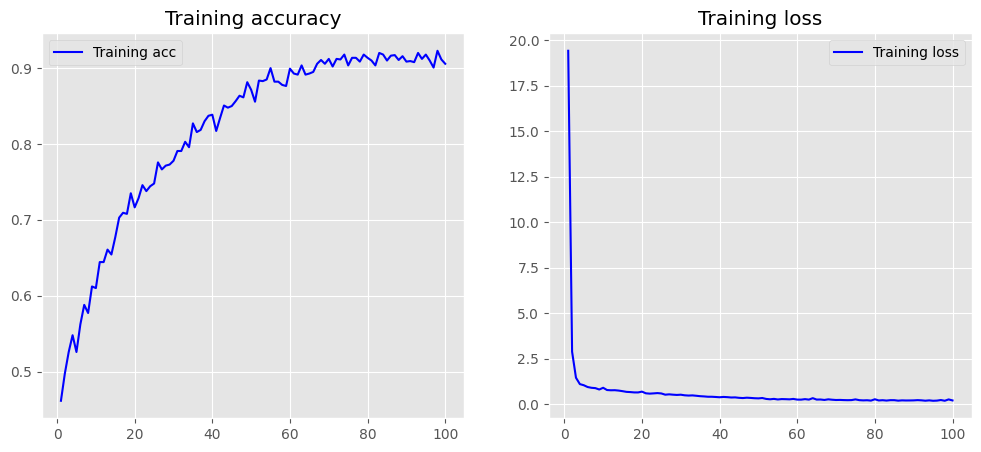

In [28]:
# Plotter le loss et l’accuracy du history
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.title('Training accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.title('Training loss')
    plt.legend()
    
plot_history(history)